Zenith averaged muon and electron neutrino flux vs Super-K I-IV data
-----------------------------------------------------------

This notebook is an extension of the 'basic_flux' example. The lepton flux is averaged over 11 bins in cos(zenith).

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir('..')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

Create an instance of an MCEqRun class. Most of its areguments are contained in the `config` dictionary from the `mceq_config` module. Look into or edit `mceq_config.py`.

If the initialization succeeds it will print out some information according to the debug level. 

In [2]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#expand the rest of the options from mceq_config.py
**config
)

InteractionYields::_load(): entering..
InteractionYields::_load(): Looking for /home/jp/projects/mceq/MCEq/data/SIBYLL23_yields_compact_ledpm.bz2
('InteractionYields::_decompress():: Decompressing ', '/home/jp/projects/mceq/MCEq/data/SIBYLL23_yields_compact_ledpm.bz2')
InteractionYields::_gen_index(): entering..
('InteractionYields::_decompress():: Saving to ', '/home/jp/projects/mceq/MCEq/data/SIBYLL23_yields_compact_ledpm.ppd')
DecayYields:_load():: Loading file /home/jp/projects/mceq/MCEq/data/decays_v1_compact.ppd
Decompressing /home/jp/projects/mceq/MCEq/data/decays_v1_compact.bz2
Saving to /home/jp/projects/mceq/MCEq/data/decays_v1_compact.ppd
Decompressing /home/jp/projects/mceq/MCEq/data/crosssections.bz2
Saving to /home/jp/projects/mceq/MCEq/data/crosssections.ppd
MCEqRun::_gen_list_of_particles():Generating particle list.
MCEqRun::_init_alias_tables():Initializing links to alias IDs.

Hadrons and stable particles:

"p", "p-bar", "n-bar", "n"

Mixed:

"pi-", "pi+", "K0L", "K-"

__________

If everything succeeds than the last message should be something like

`MCEqRun::set_primary_model():  HillasGaisser2012 H3a`.

The spline interpolating the depth-density relation of an atmosphere will be caluclated and cached during the first run.

Define variables and angles
-------------------------

In [3]:
#Power of energy to scale the flux
mag = 3

#obtain energy grid (fixed) of the solution for the x-axis of the plots
e_grid = mceq_run.e_grid

#Dictionary for results
flux = {}

#Define equidistant grid in cos(theta)
angles = np.arccos(np.linspace(1,0,11))*180./np.pi

Calculate average flux
---------------------

In [4]:
#Initialize empty grid
for frac in ['mu_conv','mu_pr','mu_total',
             'numu_conv','numu_pr','numu_total',
             'nue_conv','nue_pr','nue_total','nutau_pr']:
    flux[frac] = np.zeros_like(e_grid)

    
#Sum fluxes, calculated for different angles
for theta in angles:
    mceq_run.set_theta_deg(theta)
    mceq_run.solve()
    #_conv means conventional (mostly pions and kaons)
    flux['mu_conv'] += (mceq_run.get_solution('conv_mu+', mag)
                       + mceq_run.get_solution('conv_mu-', mag))

    # _pr means prompt (the mother of the muon had a critical energy
    # higher than a D meson. Includes all charm and direct resonance
    # contribution)
    flux['mu_pr'] += (mceq_run.get_solution('pr_mu+', mag)
                     + mceq_run.get_solution('pr_mu-', mag))

    # total means conventional + prompt
    flux['mu_total'] += (mceq_run.get_solution('total_mu+', mag)
                        + mceq_run.get_solution('total_mu-', mag))

    # same meaning of prefixes for muon neutrinos as for muons
    flux['numu_conv'] += (mceq_run.get_solution('conv_numu', mag)
                         + mceq_run.get_solution('conv_antinumu', mag))

    flux['numu_pr'] += (mceq_run.get_solution('pr_numu', mag)
                       + mceq_run.get_solution('pr_antinumu', mag))

    flux['numu_total'] += (mceq_run.get_solution('total_numu', mag)
                          + mceq_run.get_solution('total_antinumu', mag))

    # same meaning of prefixes for electron neutrinos as for muons
    flux['nue_conv'] += (mceq_run.get_solution('conv_nue', mag)
                        + mceq_run.get_solution('conv_antinue', mag))

    flux['nue_pr'] += (mceq_run.get_solution('pr_nue', mag)
                      + mceq_run.get_solution('pr_antinue', mag))

    flux['nue_total'] += (mceq_run.get_solution('total_nue', mag)
                         + mceq_run.get_solution('total_antinue', mag))


    # since there are no conventional tau neutrinos, prompt=total
    flux['nutau_pr'] += (mceq_run.get_solution('total_nutau', mag)
                        + mceq_run.get_solution('total_antinutau', mag))

#average the results
for frac in ['mu_conv','mu_pr','mu_total',
             'numu_conv','numu_pr','numu_total',
             'nue_conv','nue_pr','nue_total','nutau_pr']:
    flux[frac] = flux[frac]/float(len(angles))

MCEqRun::set_theta_deg():  0.0
Theta selection correponds to cached value, skipping calc.
MCEqRun::solve(): solver=euler and sparse=True
MCEqRun::_calculate_integration_path(): X_surface = 1033.80949621
MCEqRun::_forward_euler(): Solver will perform 355 integration steps.
Performance:   2.72ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 1.50062298775 sec
MCEqRun::set_theta_deg():  25.8419327632
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 25.8419327632 degrees.
.. took 0.03s
MCEqRun::solve(): solver=euler and sparse=True
MCEqRun::_calculate_integration_path(): X_surface = 1148.36904804
MCEqRun::_forward_euler(): Solver will perform 393 integration steps.
Performance:   1.62ms/iteration

MCEqRun::_forward_euler(): time elapsed during integration: 0.635524988174 sec
MCEqRun::set_theta_deg():  36.8698976458
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 36.8698976458 degrees.
.. to

In [5]:
from copy import copy
flux_H3a = copy(flux)

Plot with matplotlib
--------------------

NameError: name 'e_numu' is not defined

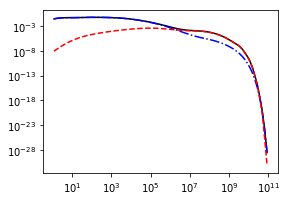

In [6]:
#get path of the home directory + Desktop
save_pdf = True
desktop = os.path.join(os.path.expanduser("~"),'Desktop')

for pref, lab in [('numu_',r'\nu_\mu'), ('nue_',r'\nu_e')]:
    plt.figure(figsize=(4.2, 3))
    plt.loglog(e_grid, flux[pref + 'total'], color='k', ls='-', lw=1.5)
    plt.loglog(e_grid, flux[pref + 'conv'], color='b', ls='-.', lw=1.5,
               label=r'conventional ${0}$'.format(lab))
    plt.loglog(e_grid, flux[pref + 'pr'], color='r',ls='--', lw=1.5, 
               label='prompt ${0}$'.format(lab))
    if pref.find('numu') != -1:
        plt.errorbar(e_numu,e_numu*sk_numu,yerr=err_numu*e_numu*sk_numu,
                    label=r'Super-K $\nu_\mu$',fmt='s')
    elif pref.find('nue') != -1:
        plt.errorbar(e_nue,e_nue*sk_nue,yerr=err_nue*e_nue*sk_nue,
                    label=r'Super-K $\nu_e$',fmt='s')
    plt.xlim(10,1e7)
    plt.ylim(1e-5,10)
    plt.xlabel(r"$E_{{{0}}}$ [GeV]".format(lab))
    plt.ylabel(r"$\Phi_{" + lab + "}$ (E/GeV)$^{" + str(mag) +" }$" + 
               "(cm$^{2}$ s sr GeV)$^{-1}$")
    plt.legend(loc='upper right',frameon=False,numpoints=1,fontsize='medium')
    plt.tight_layout()
    if save_pdf: plt.savefig(os.path.join(desktop, pref + 'flux.png'),dpi=300)

Save as in ASCII file for other types of processing
---------------------------------------------------

In [7]:
np.savetxt(open(os.path.join(desktop, 'H3a_zenith_av.txt'),'w'),
zip(e_grid, 
    flux['mu_conv'],flux['mu_pr'],flux['mu_total'],
    flux['numu_conv'],flux['numu_pr'],flux['numu_total'],
    flux['nue_conv'],flux['nue_pr'],flux['nue_total'],
    flux['nutau_pr']),
fmt='%6.5E',
header=('lepton flux scaled with E**{0}. Order (E, mu_conv, mu_pr, mu_total, ' +
        'numu_conv, numu_pr, numu_total, nue_conv, nue_pr, nue_total, ' +
        'nutau_pr').format(mag)
)

In [8]:
_,_,e_numu,sk_numu,err_numu = np.loadtxt('SK_numu_2015.dat',unpack=True)
e_numu = 10**e_numu
_,_,e_nue,sk_nue,err_nue = np.loadtxt('SK_nue_2015.dat',unpack=True)
e_nue = 10**e_nue

IOError: [Errno 2] No such file or directory: 'SK_numu_2015.dat'

In [11]:
print super_k_numu

[[ -6.00000000e-01  -4.00000000e-01  -5.10000000e-01   1.58000000e-02
    2.10000000e-01]
 [ -4.00000000e-01  -2.00000000e-01  -3.20000000e-01   1.77000000e-02
    1.70000000e-01]
 [ -2.00000000e-01   0.00000000e+00  -9.00000000e-02   1.86000000e-02
    1.60000000e-01]
 [  0.00000000e+00   2.00000000e-01   1.00000000e-01   1.68000000e-02
    1.80000000e-01]
 [  2.00000000e-01   4.00000000e-01   3.00000000e-01   1.38000000e-02
    2.00000000e-01]
 [  4.00000000e-01   6.00000000e-01   5.10000000e-01   9.59000000e-03
    2.10000000e-01]
 [  6.00000000e-01   8.00000000e-01   7.10000000e-01   6.68000000e-03
    2.00000000e-01]
 [  8.00000000e-01   1.00000000e+00   9.00000000e-01   4.79000000e-03
    1.70000000e-01]
 [  1.00000000e+00   1.50000000e+00   1.21000000e+00   2.62000000e-03
    1.30000000e-01]
 [  1.50000000e+00   2.00000000e+00   1.73000000e+00   1.20000000e-03
    1.60000000e-01]
 [  2.00000000e+00   3.00000000e+00   2.40000000e+00   2.49000000e-04
    1.80000000e-01]
 [  3.0000

<Container object of 3 artists>

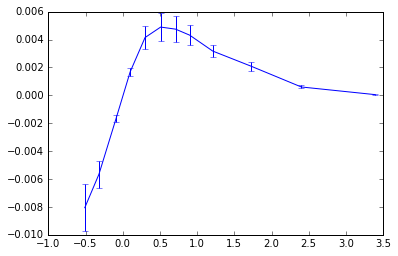

In [16]:
plt.errorbar(e_numu,e_numu*sk_numu,yerr=err_numu*e_numu*sk_numu)